In [3]:
import pandas as pd

In [4]:
!pwd

/Users/david/github/PyCon2015/1live


In [5]:
train = pd.read_csv("../input/train.csv")

In [7]:
train.head()

,Unnamed: 0,PostId,PostCreationDate,OwnerUserId,OwnerCreationDate,ReputationAtPostCreation,OwnerUndeletedAnswerCountAtPostTime,Title,BodyMarkdown,Tag1,Tag2,Tag3,Tag4,Tag5,PostClosedDate,OpenStatus
0,0,6046168,05/18/2011 14:14:05,543315,09/17/2010 10:15:06,1,2,For Mongodb is it better to reference an objec...,I am building a corpus of indexed sentences in...,mongodb,NaN,NaN,NaN,NaN,NaN,1
1,1,4873911,02/02/2011 11:30:10,465076,10/03/2010 09:30:58,192,24,How to insert schemalocation in a xml document...,i create a xml document with JAXP and search a...,dom,xsd,jaxp,NaN,NaN,NaN,1
2,2,3311559,07/22/2010 17:21:54,406143,07/22/2010 16:58:20,1,0,Too many lookup tables,What are the adverse effects of having too man...,sql-server,database-design,enums,NaN,NaN,NaN,1
3,3,9990413,04/03/2012 09:18:39,851755,07/19/2011 10:22:40,4,1,What is this PHP code in VB.net,I am looking for the vb.net equivalent of this...,php,vb.net,NaN,NaN,NaN,04/15/2012 21:12:48,0
4,4,10421966,05/02/2012 21:25:01,603588,02/04/2011 18:05:34,334,14,Spring-Data mongodb querying multiple classes ...,"With Spring-Data, you can use the @Document an...",mongodb,spring-data,NaN,NaN,NaN,NaN,1


In [9]:
train.head().transpose()

,0,1,2,3,4
Unnamed: 0,0,1,2,3,4
PostId,6046168,4873911,3311559,9990413,10421966
PostCreationDate,05/18/2011 14:14:05,02/02/2011 11:30:10,07/22/2010 17:21:54,04/03/2012 09:18:39,05/02/2012 21:25:01
OwnerUserId,543315,465076,406143,851755,603588
OwnerCreationDate,09/17/2010 10:15:06,10/03/2010 09:30:58,07/22/2010 16:58:20,07/19/2011 10:22:40,02/04/2011 18:05:34
ReputationAtPostCreation,1,192,1,4,334
OwnerUndeletedAnswerCountAtPostTime,2,24,0,1,14
Title,For Mongodb is it better to reference an objec...,How to insert schemalocation in a xml document...,Too many lookup tables,What is this PHP code in VB.net,Spring-Data mongodb querying multiple classes ...
BodyMarkdown,I am building a corpus of indexed sentences in...,i create a xml document with JAXP and search a...,What are the adverse effects of having too man...,I am looking for the vb.net equivalent of this...,"With Spring-Data, you can use the @Document an..."
Tag1,mongodb,dom,sql-server,php,mongodb


In [10]:
train["TitleLength"] = train.Title.apply(len)

In [11]:
train.TitleLength

0          76
1          54
2          23
3          31
4          75
5          58
6          38
7          21
8          66
9          87
10         76
11         71
12         64
13         69
14         38
15         30
16         25
17         68
18         75
19         53
20         94
21         49
22         24
23         72
24         37
25         80
26         37
27         28
28         84
29         37
         ... 
140242     44
140243     48
140244     41
140245     55
140246     54
140247     25
140248     42
140249     22
140250     37
140251    107
140252     64
140253     30
140254     56
140255     71
140256     20
140257     35
140258     53
140259     36
140260     56
140261     35
140262     29
140263    120
140264     51
140265     65
140266     26
140267     71
140268     75
140269     32
140270     23
140271     71
Name: TitleLength, dtype: int64

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline


(array([  3.57020000e+04,   6.57980000e+04,   2.93590000e+04,
          7.44800000e+03,   1.57500000e+03,   3.80000000e+02,
          5.00000000e+00,   1.00000000e+00,   1.00000000e+00,
          3.00000000e+00]),
 array([  10.,   34.,   58.,   82.,  106.,  130.,  154.,  178.,  202.,
         226.,  250.]),
 <a list of 10 Patch objects>)

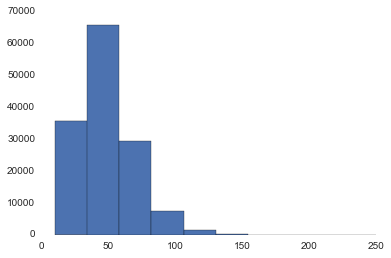

In [14]:
plt.hist(train.TitleLength.values)

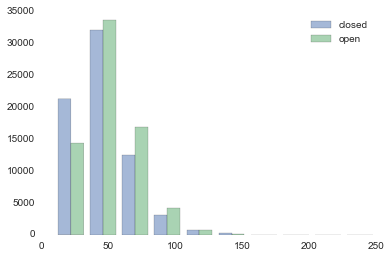

In [16]:
plt.hist([train[train.OpenStatus==0].TitleLength.values, 
          train[train.OpenStatus==1].TitleLength.values],
         label = ["closed", "open"],
         alpha=.5);
plt.legend()

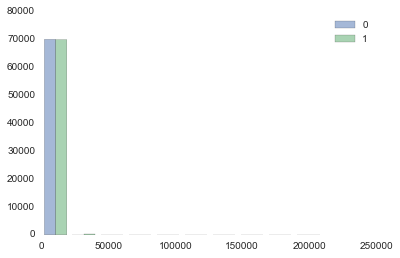

In [18]:
plt.hist([train[train.OpenStatus==0].ReputationAtPostCreation.values, 
          train[train.OpenStatus==1].ReputationAtPostCreation.values],
         label = [0, 1],
         alpha=.5);
plt.legend()

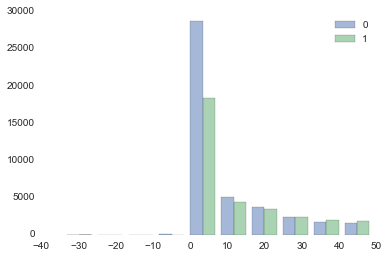

In [19]:
train_low_rep = train[train.ReputationAtPostCreation < 50]
plt.hist([train_low_rep[train_low_rep.OpenStatus==0].ReputationAtPostCreation.values, 
          train_low_rep[train_low_rep.OpenStatus==1].ReputationAtPostCreation.values],
         label = [0, 1],
         alpha=.5);
plt.legend()


In [26]:
%run ../1/1.py

In [27]:
train = load_feature_matrix("../input/train.csv")

In [28]:
test = load_feature_matrix("../input/test.csv")

In [29]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()

In [30]:
columns = ["ReputationAtPostCreation", "TitleLength"]

In [32]:
lr.fit(X = np.asarray(train[columns]), 
       y = np.asarray(train.OpenStatus).transpose())


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr',
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0)

In [33]:
lr.predict(np.asarray(train[columns]))

array([1, 1, 0, ..., 0, 0, 1])

In [34]:
np.mean(lr.predict(np.asarray(train[columns])) == train.OpenStatus)

0.56027574997148399

In [35]:
!head ../input/even_odds_sample_submission.csv

"id","OpenStatus"
11768878,0.5
11768880,0.5
11803678,0.5
11803496,0.5
11803700,0.5
11927241,0.5
11927226,0.5
11927247,0.5
11927248,0.5


In [38]:
predictions = lr.predict_proba(np.asarray(test[columns]))

In [39]:
predictions

array([[ 0.53865572,  0.46134428],
       [ 0.5126922 ,  0.4873078 ],
       [ 0.46354773,  0.53645227],
       ..., 
       [ 0.5286658 ,  0.4713342 ],
       [ 0.5329884 ,  0.4670116 ],
       [ 0.57681228,  0.42318772]])

In [41]:
predictions = predictions[:,1]

In [42]:
submission = pd.DataFrame({"id": test.PostId, "OpenStatus": predictions})

In [44]:
submission.to_csv("../submissions/first_submission.csv")

In [45]:
    !head ../submissions/first_submission.csv

,OpenStatus,id
0,0.4613442833831722,11768878
1,0.4873077969266373,11768880
2,0.5364522728505838,11803678
3,0.4643847937420517,11803496
4,0.46747052797421246,11803700
5,0.4300963048222807,11927241
6,0.5952349249022628,11927226
7,0.46352014137915953,11927247
8,0.4597117128306622,11927248


In [46]:
submission.to_csv("../submissions/first_submission.csv", index = False)

In [47]:
!head ../submissions/first_submission.csv

OpenStatus,id
0.4613442833831722,11768878
0.4873077969266373,11768880
0.5364522728505838,11803678
0.4643847937420517,11803496
0.46747052797421246,11803700
0.4300963048222807,11927241
0.5952349249022628,11927226
0.46352014137915953,11927247
0.4597117128306622,11927248


"Log loss" is based on:

$$\prod_{i=1}^N \text{probability that prediction i is correct}$$

# Homework

- explore more features!
- make your own submission!




In [51]:
map(lambda title, tag1: title_length < 50, train.TitleLength, train.Tag1)

In [52]:
np.array(map(lambda title_length: title_length < 50, train.TitleLength))

array(<map object at 0x10ac45cf8>, dtype=object)